<a href="https://colab.research.google.com/github/fernando029/data_science/blob/main/Predictive_Modelling_Food_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predictive Modelling Use Case - Food Delivery Time Prediction**

Author: Fernando

Discussion Docs Link: https://docs.google.com/document/d/1S40w7Eep6XS5vrLKFMca2tCqvHDKFvvePItT6lncxPc/edit


## Library Setup

In [2]:
import pandas as pd
from google.colab import files

In [9]:
from math import radians, sin, cos, sqrt, atan2

## Data Import

In [4]:
# Upload the Excel file
uploaded = files.upload()

# Replace 'your_file.xls' with the actual file name
raw = pd.read_excel('Food Delivery Time Prediction Case Study.xlsx')

# Display the DataFrame
raw

Saving Food Delivery Time Prediction Case Study.xlsx to Food Delivery Time Prediction Case Study (1).xlsx


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


## Data Wrangling/ Cleaning

In [5]:
raw.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [6]:
# Check for missing values in the DataFrame
missing_values = raw.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64


In [8]:
# Check for duplicate records in the DataFrame
duplicate_records = raw.duplicated().sum()
print("Duplicate Records:\n", duplicate_records)

Duplicate Records:
 0


### Transforming Long/ Lat to Distance

In [10]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of the Earth in kilometers (mean value)
    radius = 6371.0

    # Calculate the distance
    distance = radius * c

    return distance

In [12]:
raw['Distance_km'] = raw.apply(lambda row: haversine_distance(row['Delivery_location_latitude'],
                                                             row['Delivery_location_longitude'],
                                                             row['Restaurant_latitude'],
                                                             row['Restaurant_longitude']),
                             axis=1)

In [24]:
raw.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Distance_km
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


In [15]:
# Identify numerical and categorical columns
numerical_columns = raw.select_dtypes(include=['number']).columns
categorical_columns = raw.select_dtypes(include=['object', 'category']).columns

# Create separate DataFrames for numerical and categorical variables
numerical_df = raw[numerical_columns]
categorical_df = raw[categorical_columns]

In [19]:
from tabulate import tabulate

numerical_summary = numerical_df.describe()
categorical_summary = categorical_df.describe()

# Display numerical summary in a nicely formatted table
print("Summary Statistics for Numerical Variables:")
print(tabulate(numerical_summary, headers='keys', tablefmt='pretty'))

# Display categorical summary in a nicely formatted table
print("\nSummary Statistics for Categorical Variables:")
print(tabulate(categorical_summary.reset_index(), headers='keys', tablefmt='pretty'))

Summary Statistics for Numerical Variables:
+-------+---------------------+-------------------------+---------------------+----------------------+----------------------------+-----------------------------+-------------------+--------------------+
|       | Delivery_person_Age | Delivery_person_Ratings | Restaurant_latitude | Restaurant_longitude | Delivery_location_latitude | Delivery_location_longitude |  Time_taken(min)  |    Distance_km     |
+-------+---------------------+-------------------------+---------------------+----------------------+----------------------------+-----------------------------+-------------------+--------------------+
| count |       45593.0       |         45593.0         |       45593.0       |       45593.0        |          45593.0           |           45593.0           |      45593.0      |      45593.0       |
| mean  |  29.54407474831663  |    4.632366810694624    | 17.017728506525124  |   70.2313323380782   |     17.465185865088937     |      70.8457

In [26]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'numerical_columns' is a list of numerical columns
numerical_subset = numerical_df[['Delivery_person_Age','Delivery_person_Ratings','Time_taken(min)', 'Distance_km']]

# Function to detect outliers using IQR
def detect_outliers(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers

# Identify outliers for each numerical column
outliers = pd.DataFrame()
for column in numerical_subset:
    outliers[column] = detect_outliers(numerical_subset, column)

# Display the count of outliers in each column
print("Count of Outliers in Each Numerical Column:")
print(outliers.sum())

Count of Outliers in Each Numerical Column:
Delivery_person_Age          53
Delivery_person_Ratings    5345
Time_taken(min)             270
Distance_km                 431
dtype: int64


In [27]:
# Remove outliers from the DataFrame
df_no_outliers = raw[~outliers.any(axis=1)]

# Display the shape before and after removing outliers
print("Shape before removing outliers:", raw.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Shape before removing outliers: (45593, 12)
Shape after removing outliers: (39667, 12)


In [28]:
df_no_outliers.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Distance_km
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


In [33]:
df = df_no_outliers[['Delivery_person_Age','Delivery_person_Ratings','Type_of_order', 'Type_of_vehicle', 'Distance_km', 'Time_taken(min)']]

## Exploratory Data Analysis

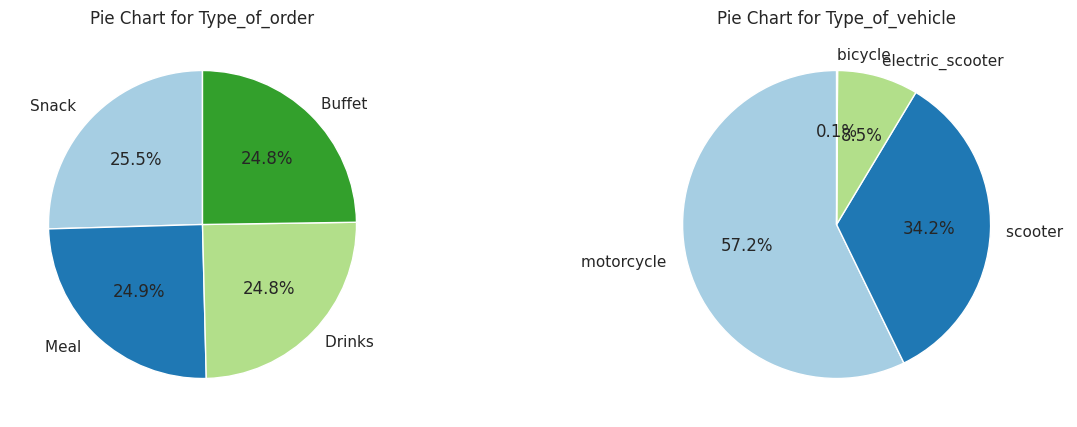

In [50]:
# Assuming 'categorical_columns' is a list of your categorical columns
categorical_columns = ['Type_of_order', 'Type_of_vehicle']

# Create subplots for each categorical column
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(15, 5))

for i, categorical_column in enumerate(categorical_columns):
    category_counts = df[categorical_column].value_counts()
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[i].set_title(f'Pie Chart for {categorical_column}')

plt.show()

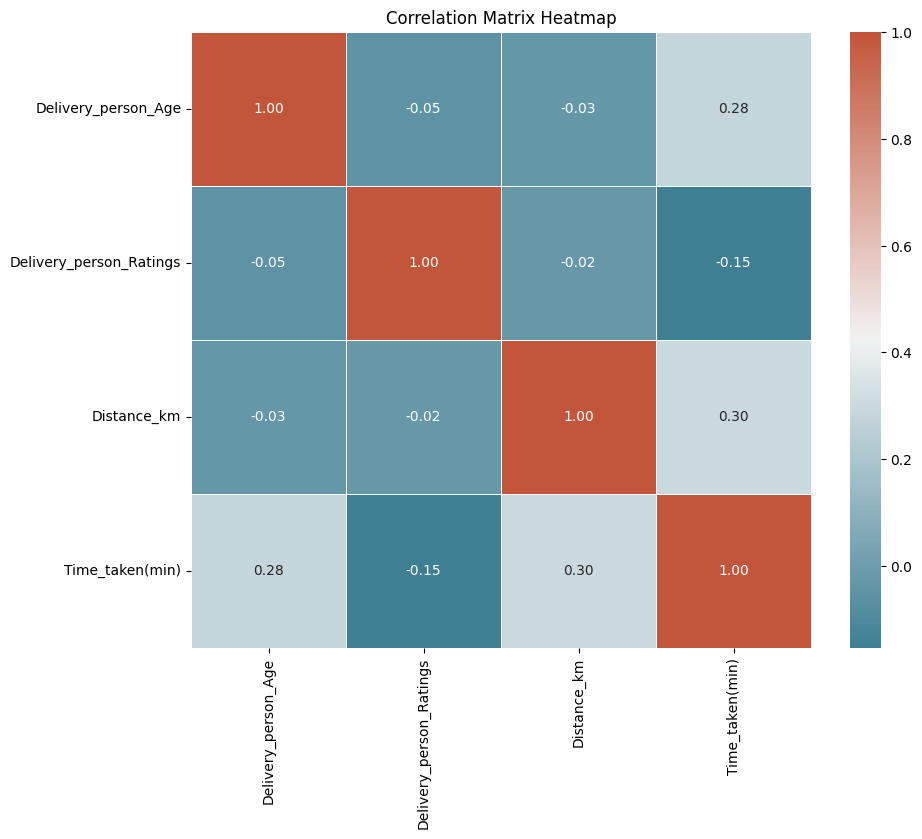

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a custom color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

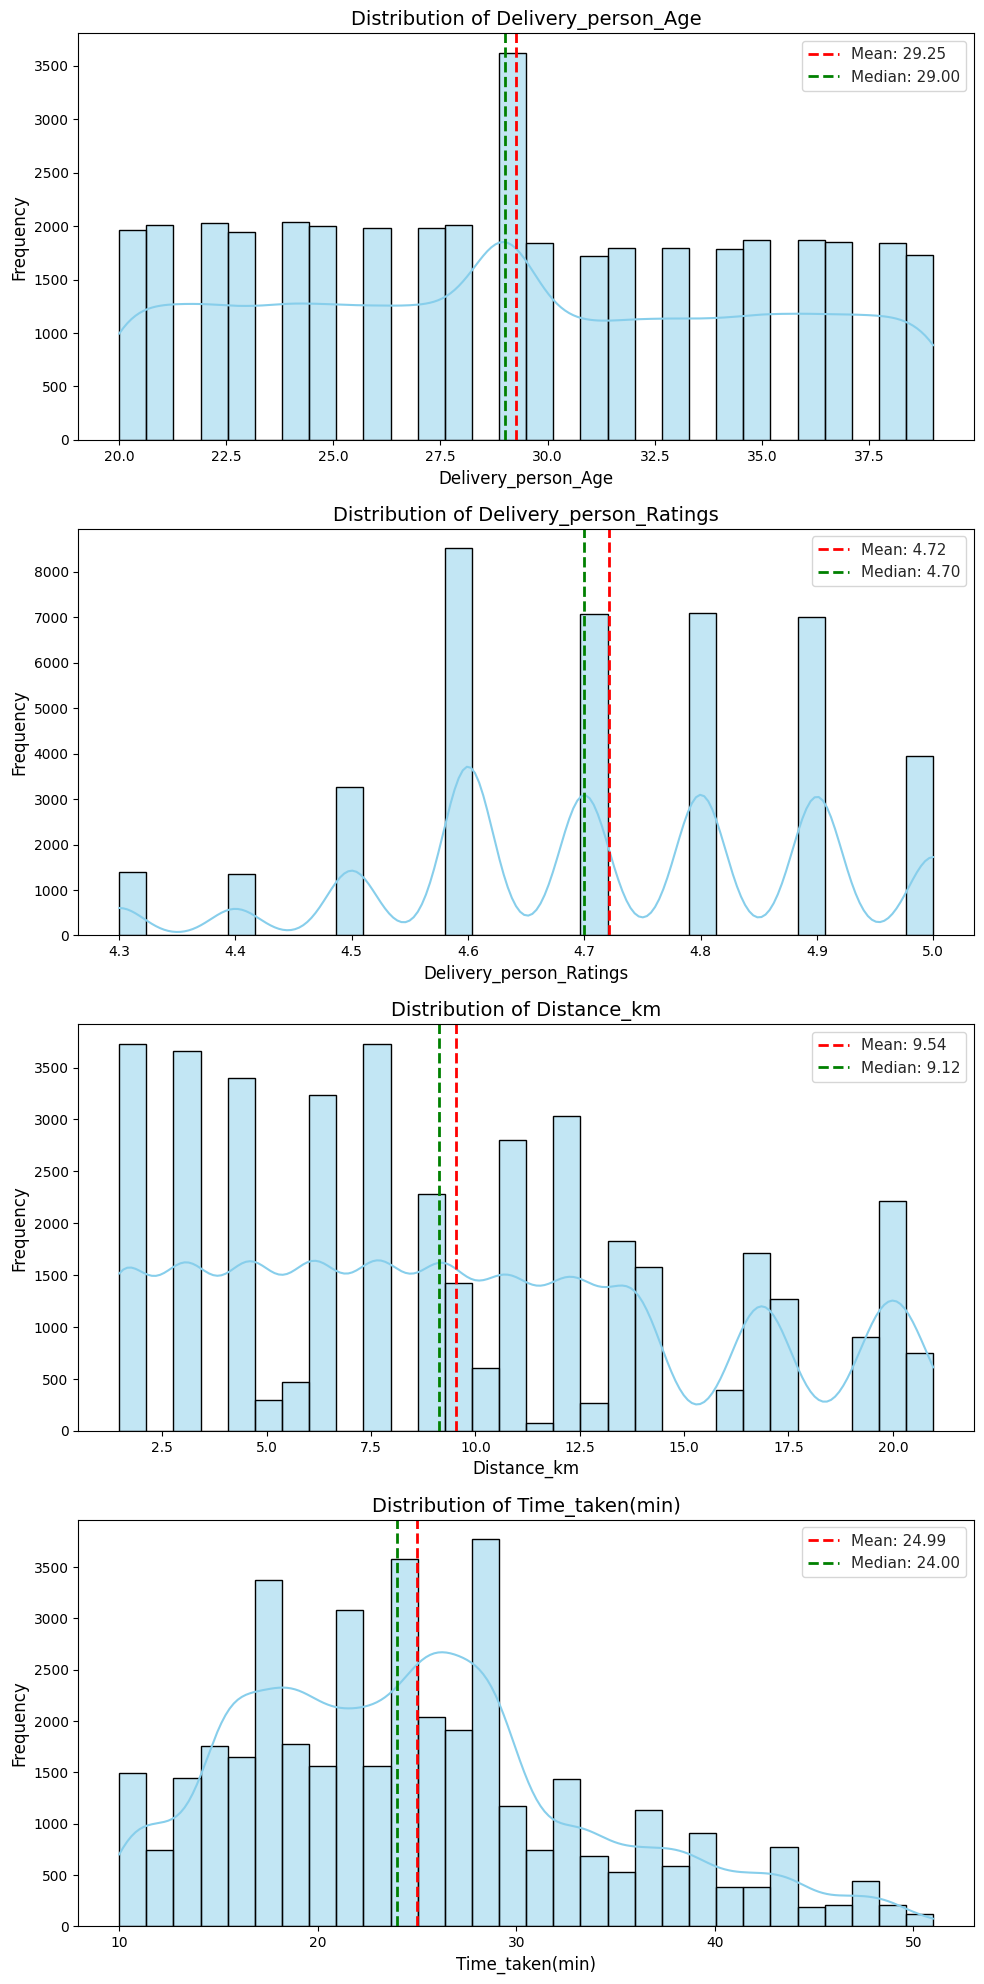

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

# Customize Seaborn style
sns.set(style="whitegrid")

# Iterate through each numerical variable and create a distribution plot
for i, numerical_var in enumerate(numerical_columns):
    sns.histplot(data=df, x=numerical_var, kde=True, ax=axes[i], bins=30, color='skyblue', edgecolor='black')

    # Add title and labels
    axes[i].set_title(f'Distribution of {numerical_var}', fontsize=14)
    axes[i].set_xlabel(numerical_var, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

    # Add mean and median annotations
    mean_val = df[numerical_var].mean()
    median_val = df[numerical_var].median()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Data Pre-processing

In [51]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Distance_km,Time_taken(min)
0,37,4.9,Snack,motorcycle,3.025149,24
1,34,4.5,Snack,scooter,20.183530,33
2,23,4.4,Drinks,motorcycle,1.552758,26
3,38,4.7,Buffet,motorcycle,7.790401,21
4,32,4.6,Snack,scooter,6.210138,30


In [56]:
from sklearn.preprocessing import StandardScaler
# Assuming 'df' is your DataFrame with numerical and target columns
numerical_columns = df.drop(columns=['Time_taken(min)']).select_dtypes(include=['number']).columns
target_column = 'Time_taken(min)'  # Replace with the actual name of your target variable

# Separate the features and target variable
X = df[numerical_columns].copy()  # Features (numerical variables)
y = df[target_column].copy()  # Target variable

# Standardize only the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Concatenate the scaled numerical features with the non-numerical features and target variable
df_scaled = pd.concat([pd.DataFrame(X_scaled, columns=numerical_columns), df.drop(columns=numerical_columns)], axis=1)
df_scaled.head()

,Delivery_person_Age,Delivery_person_Ratings,Distance_km,Type_of_order,Type_of_vehicle,Time_taken(min)
0,1.372657,1.008694,-1.167034,Snack,motorcycle,24.0
1,0.840966,-1.245687,1.904930,Snack,scooter,33.0
2,-1.108565,-1.809282,-1.430645,Drinks,motorcycle,26.0
3,1.549887,-0.118496,-0.313884,Buffet,motorcycle,21.0
4,0.486506,-0.682091,-0.596807,Snack,scooter,30.0


In [175]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame with numerical and target columns
numerical_columns = df.drop(columns=['Time_taken(min)']).select_dtypes(include=['number']).columns
target_column = 'Time_taken(min)'  # Replace with the actual name of your target variable

# Separate the features and target variable
X = df[numerical_columns].copy()  # Features (numerical variables)
y = df[target_column].copy()  # Target variable

# Min-max scaling only the numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Concatenate the scaled numerical features with the non-numerical features and target variable
df_scaled = pd.concat([pd.DataFrame(X_scaled, columns=numerical_columns), df.drop(columns=numerical_columns)], axis=1)
df_scaled.head()

,Delivery_person_Age,Delivery_person_Ratings,Distance_km,Type_of_order,Type_of_vehicle,Time_taken(min)
0,0.894737,0.857143,0.079986,Snack,motorcycle,24.0
1,0.736842,0.285714,0.959704,Snack,scooter,33.0
2,0.157895,0.142857,0.004496,Drinks,motorcycle,26.0
3,0.947368,0.571429,0.324303,Buffet,motorcycle,21.0
4,0.631579,0.428571,0.243282,Snack,scooter,30.0


In [195]:
# # # One-hot Encoding
# categorical_columns = ['Type_of_order', 'Type_of_vehicle']
# df_encoded = pd.get_dummies(df_scaled, columns=categorical_columns, drop_first=True)
# df_cleaned = df_encoded.dropna()

In [216]:
# # One-hot Encoding
categorical_columns = ['Type_of_order', 'Type_of_vehicle']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_cleaned = df_encoded.dropna()

In [217]:
df_cleaned.head()

,Delivery_person_Age,Delivery_person_Ratings,Distance_km,Time_taken(min),Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,37,4.9,3.025149,24,0,0,1,0,1,0
1,34,4.5,20.183530,33,0,0,1,0,0,1
2,23,4.4,1.552758,26,1,0,0,0,1,0
3,38,4.7,7.790401,21,0,0,0,0,1,0
4,32,4.6,6.210138,30,0,0,1,0,0,1


## Train and Test Data Split

In [218]:
from sklearn.model_selection import train_test_split

# Assuming 'df_cleaned' is your DataFrame after removing NaN values
X = df_cleaned.drop(columns=['Time_taken(min)'])  # Features
y = df_cleaned['Time_taken(min)']  # Target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Machine Learning Modelling

### Linear Regression Model

In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set using MAPE
mape_train = np.mean(np.abs(training_results['Actual']-training_results['Predicted'])/training_results['Actual']*100)
print(f'Training Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%')

# Optionally, you can also evaluate using MAE for comparison
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Absolute Error (MAE): {mae_train:.2f}')

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set using MAPE
mape_test = np.mean(np.abs(test_results['Actual']-test_results['Predicted'])/test_results['Actual']*100)
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%')

# Optionally, you can also evaluate using MAE for comparison
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error (MAE): {mae_test:.2f}')

# Create a DataFrame to store the results
results_df_lr = pd.DataFrame({
    'Model': "Linear Regression",
    'Training_MAPE': [mape_train],
    'Test_MAPE': [mape_test],
    'Training_MAE': [mae_train],
    'Test_MAE': [mae_test]
})

Training Mean Absolute Percentage Error (MAPE): 24.02%
Training Mean Absolute Error (MAE): 6.27
Test Mean Absolute Percentage Error (MAPE): 25.68%
Test Mean Absolute Error (MAE): 6.20


#### Cross Validation

In [220]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error

model = LinearRegression()

# Custom scoring function for MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Perform k-fold cross-validation and calculate MAPE for each fold
mape_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_percentage_error))

# Print the mean MAPE across all folds
print(f'Mean Cross-Validated MAPE: {np.mean(mape_scores):.2f}%')

Mean Cross-Validated MAPE: 28.85%


In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Store the actual and predicted values for the training set
training_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

# Evaluate the model on the training set using Mean Absolute Percentage Error (MAPE)
mape_train = np.mean(np.abs(training_results['Actual']-training_results['Predicted'])/training_results['Actual']*100)
print(f'Training Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%')

# Optionally, you can also evaluate using Mean Absolute Error (MAE) for comparison
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Absolute Error (MAE): {mae_train:.2f}')

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Store the actual and predicted values for the test set
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Evaluate the model on the test set using Mean Absolute Percentage Error (MAPE)
mape_test = np.mean(np.abs(test_results['Actual']-test_results['Predicted'])/test_results['Actual']*100)
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%')

# Optionally, you can also evaluate using Mean Absolute Error (MAE) for comparison
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error (MAE): {mae_test:.2f}')

# Create a DataFrame to store the results
results_df_rf = pd.DataFrame({
    'Model': "Random Forest",
    'Training_MAPE': [mape_train],
    'Test_MAPE': [mape_test],
    'Training_MAE': [mae_train],
    'Test_MAE': [mae_test]
})

Training Mean Absolute Percentage Error (MAPE): 10.74%
Training Mean Absolute Error (MAE): 2.36
Test Mean Absolute Percentage Error (MAPE): 27.97%
Test Mean Absolute Error (MAE): 6.20


In [222]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Train an XGBoost Regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgb_model.predict(X_train)

# Store the actual and predicted values for the training set
training_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

# Evaluate the model on the training set using Mean Absolute Percentage Error (MAPE)
mape_train = np.mean(np.abs(training_results['Actual'] - training_results['Predicted']) / training_results['Actual'] * 100)
print(f'Training Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%')

# Optionally, you can also evaluate using Mean Absolute Error (MAE) for comparison
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Absolute Error (MAE): {mae_train:.2f}')

# Make predictions on the test set
y_test_pred = xgb_model.predict(X_test)

# Store the actual and predicted values for the test set
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Evaluate the model on the test set using Mean Absolute Percentage Error (MAPE)
mape_test = np.mean(np.abs(test_results['Actual'] - test_results['Predicted']) / test_results['Actual'] * 100)
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%')

# Optionally, you can also evaluate using Mean Absolute Error (MAE) for comparison
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error (MAE): {mae_test:.2f}')

# Create a DataFrame to store the results
results_df_xgb = pd.DataFrame({
    'Model': "XGBoost",
    'Training_MAPE': [mape_train],
    'Test_MAPE': [mape_test],
    'Training_MAE': [mae_train],
    'Test_MAE': [mae_test]
})

Training Mean Absolute Percentage Error (MAPE): 24.10%
Training Mean Absolute Error (MAE): 5.24
Test Mean Absolute Percentage Error (MAPE): 26.67%
Test Mean Absolute Error (MAE): 5.92


In [223]:
pip install catboost

In [224]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined

# Train a CatBoost Regression model
model_name = "CatBoost Regression"
catboost_model = CatBoostRegressor(iterations=100,  # You can adjust this
                                   depth=6,         # You can adjust this
                                   learning_rate=0.1,  # You can adjust this
                                   loss_function='MAE',
                                   random_seed=42)

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20, verbose=10)

# Make predictions on the training set
y_train_pred = catboost_model.predict(X_train)

# Evaluate the model on the training set using MAPE
mape_train = np.mean(np.abs(y_train - y_train_pred) / y_train * 100)
print(f'Training Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%')

# Optionally, you can also evaluate using MAE for comparison
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Absolute Error (MAE): {mae_train:.2f}')

# Make predictions on the test set
y_test_pred = catboost_model.predict(X_test)

# Evaluate the model on the test set using MAPE
mape_test = np.mean(np.abs(y_test - y_test_pred) / y_test * 100)
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%')

# Optionally, you can also evaluate using MAE for comparison
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error (MAE): {mae_test:.2f}')

# Get feature importance
feature_importance = catboost_model.get_feature_importance()

# Map feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importance))

# Print feature importance scores
print("Feature Importance:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

# Create a DataFrame to store the results
results_df_catboost = pd.DataFrame({
    'Model': [model_name],
    'Training_MAPE': [mape_train],
    'Test_MAPE': [mape_test],
    'Training_MAE': [mae_train],
    'Test_MAE': [mae_test]
})

0:	learn: 6.8257639	test: 6.8294040	best: 6.8294040 (0)	total: 6.27ms	remaining: 621ms
10:	learn: 5.9645788	test: 5.9580072	best: 5.9580072 (10)	total: 65.7ms	remaining: 531ms
20:	learn: 5.8030992	test: 5.7992434	best: 5.7992434 (20)	total: 122ms	remaining: 458ms
30:	learn: 5.7679033	test: 5.7745797	best: 5.7745797 (30)	total: 189ms	remaining: 421ms
40:	learn: 5.7499569	test: 5.7702902	best: 5.7694511 (38)	total: 248ms	remaining: 356ms
50:	learn: 5.7385571	test: 5.7679369	best: 5.7679369 (50)	total: 304ms	remaining: 292ms
60:	learn: 5.7295367	test: 5.7686707	best: 5.7678706 (56)	total: 361ms	remaining: 231ms
70:	learn: 5.7215570	test: 5.7660145	best: 5.7660145 (70)	total: 418ms	remaining: 171ms
80:	learn: 5.7119345	test: 5.7654348	best: 5.7645034 (76)	total: 477ms	remaining: 112ms
90:	learn: 5.7047802	test: 5.7647480	best: 5.7644887 (89)	total: 531ms	remaining: 52.5ms
99:	learn: 5.6989776	test: 5.7656524	best: 5.7644887 (89)	total: 580ms	remaining: 0us

bestTest = 5.764488691
bestItera

In [225]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Train a CatBoost Regression model
catboost_model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='MAE', random_seed=42)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20, verbose=10)

# Make predictions on the test set
y_test_pred = catboost_model.predict(X_test)

# Create a new DataFrame with original test data and predicted values
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
test_results = pd.concat([X_test, test_results], axis=1)

# Print or display the new DataFrame
print("Original Test Data with Predicted Values:")
print(test_results)

0:	learn: 6.8257639	test: 6.8294040	best: 6.8294040 (0)	total: 7.27ms	remaining: 720ms
10:	learn: 5.9645788	test: 5.9580072	best: 5.9580072 (10)	total: 67.6ms	remaining: 547ms
20:	learn: 5.8030992	test: 5.7992434	best: 5.7992434 (20)	total: 127ms	remaining: 476ms
30:	learn: 5.7679033	test: 5.7745797	best: 5.7745797 (30)	total: 182ms	remaining: 404ms
40:	learn: 5.7499569	test: 5.7702902	best: 5.7694511 (38)	total: 240ms	remaining: 346ms
50:	learn: 5.7385571	test: 5.7679369	best: 5.7679369 (50)	total: 298ms	remaining: 286ms
60:	learn: 5.7295367	test: 5.7686707	best: 5.7678706 (56)	total: 355ms	remaining: 227ms
70:	learn: 5.7215570	test: 5.7660145	best: 5.7660145 (70)	total: 415ms	remaining: 170ms
80:	learn: 5.7119345	test: 5.7654348	best: 5.7645034 (76)	total: 476ms	remaining: 112ms
90:	learn: 5.7047802	test: 5.7647480	best: 5.7644887 (89)	total: 532ms	remaining: 52.7ms
99:	learn: 5.6989776	test: 5.7656524	best: 5.7644887 (89)	total: 582ms	remaining: 0us

bestTest = 5.764488691
bestItera

In [226]:
test_results.head()

,Delivery_person_Age,Delivery_person_Ratings,Distance_km,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Actual,Predicted
12950,28,5.0,17.076514,0,0,0,1,0,0,17,24.364287
36226,39,5.0,10.721987,1,0,0,0,1,0,37,34.162748
13038,37,4.5,3.025321,0,0,1,0,1,0,28,24.255238
26380,22,4.8,7.647093,0,0,1,0,0,1,16,18.352314
3459,29,4.6,13.830085,0,1,0,0,1,0,38,27.534257


In [227]:
test_results

,Delivery_person_Age,Delivery_person_Ratings,Distance_km,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Actual,Predicted
12950,28,5.0,17.076514,0,0,0,1,0,0,17,24.364287
36226,39,5.0,10.721987,1,0,0,0,1,0,37,34.162748
13038,37,4.5,3.025321,0,0,1,0,1,0,28,24.255238
26380,22,4.8,7.647093,0,0,1,0,0,1,16,18.352314
3459,29,4.6,13.830085,0,1,0,0,1,0,38,27.534257
...,...,...,...,...,...,...,...,...,...,...,...
41186,38,4.5,9.435202,1,0,0,0,1,0,30,26.549543
20678,32,4.7,3.073202,0,0,1,0,1,0,20,24.172072
1917,26,4.7,4.537400,0,0,1,0,1,0,21,19.676311
33353,22,4.9,3.073454,1,0,0,0,0,1,19,16.637601


In [228]:
# filtered_df = test_results[test_results['Type_of_vehicle_electric_scooter'] == 1]

test_results = pd.DataFrame(test_results)
column_to_filter = 'Type_of_vehicle_motorcycle '
filter_value = 1

# Create a boolean mask based on the condition
mask = test_results[column_to_filter] == filter_value

# Apply the mask to filter rows
filtered_df = test_results[mask]
np.mean(np.abs(filtered_df['Actual']-filtered_df['Predicted'])/filtered_df['Actual'])*100

24.415116976166207

In [229]:
# filtered_df = test_results[test_results['Type_of_vehicle_electric_scooter'] == 1]

test_results = pd.DataFrame(test_results)
column_to_filter = 'Type_of_vehicle_electric_scooter '
filter_value = 1

# Create a boolean mask based on the condition
mask = test_results[column_to_filter] == filter_value

# Apply the mask to filter rows
filtered_df = test_results[mask]
np.mean(np.abs(filtered_df['Actual']-filtered_df['Predicted'])/filtered_df['Actual'])*100

26.50990841439096

In [230]:
# filtered_df = test_results[test_results['Type_of_vehicle_electric_scooter'] == 1]

test_results = pd.DataFrame(test_results)
column_to_filter = 'Type_of_vehicle_scooter '
filter_value = 1

# Create a boolean mask based on the condition
mask = test_results[column_to_filter] == filter_value

# Apply the mask to filter rows
filtered_df = test_results[mask]
np.mean(np.abs(filtered_df['Actual']-filtered_df['Predicted'])/filtered_df['Actual'])*100

26.499743719816653

In [231]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model_name = "Neural Network"
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled).flatten()

# Evaluate the model on the training set using MAPE
mape_train = np.mean(np.abs(y_train - y_train_pred) / y_train * 100)
print(f'Training Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%')

# Optionally, you can also evaluate using MAE for comparison
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Absolute Error (MAE): {mae_train:.2f}')

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model on the test set using MAPE
mape_test = np.mean(np.abs(y_test - y_test_pred) / y_test * 100)
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%')

# Optionally, you can also evaluate using MAE for comparison
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error (MAE): {mae_test:.2f}')

# Create a DataFrame to store the results
results_df_nn = pd.DataFrame({
    'Model': [model_name],
    'Training_MAPE': [mape_train],
    'Test_MAPE': [mape_test],
    'Training_MAE': [mae_train],
    'Test_MAE': [mae_test]
})

Epoch 1/50
992/992 - 3s - loss: 7.6078 - val_loss: 6.1183 - 3s/epoch - 3ms/step
Epoch 2/50
992/992 - 2s - loss: 6.1428 - val_loss: 6.0674 - 2s/epoch - 2ms/step
Epoch 3/50
992/992 - 5s - loss: 6.1147 - val_loss: 6.0615 - 5s/epoch - 5ms/step
Epoch 4/50
992/992 - 4s - loss: 6.0938 - val_loss: 6.0423 - 4s/epoch - 4ms/step
Epoch 5/50
992/992 - 3s - loss: 6.0826 - val_loss: 6.0446 - 3s/epoch - 3ms/step
Epoch 6/50
992/992 - 5s - loss: 6.0612 - val_loss: 6.0859 - 5s/epoch - 5ms/step
Epoch 7/50
992/992 - 5s - loss: 6.0518 - val_loss: 6.0510 - 5s/epoch - 5ms/step
Epoch 8/50
992/992 - 3s - loss: 6.0400 - val_loss: 6.0458 - 3s/epoch - 3ms/step
Epoch 9/50
992/992 - 4s - loss: 6.0254 - val_loss: 6.0079 - 4s/epoch - 4ms/step
Epoch 10/50
992/992 - 6s - loss: 6.0148 - val_loss: 5.9837 - 6s/epoch - 6ms/step
Epoch 11/50
992/992 - 3s - loss: 6.0135 - val_loss: 5.9803 - 3s/epoch - 3ms/step
Epoch 12/50
992/992 - 2s - loss: 6.0015 - val_loss: 5.9842 - 2s/epoch - 2ms/step
Epoch 13/50
992/992 - 2s - loss: 5.99

### Tuned Model

In [232]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined

# Define the parameter grid for grid search
param_grid = {
    'iterations': [100, 200, 300],  # You can adjust this
    'depth': [6, 8, 10],  # You can adjust this
    'learning_rate': [0.05, 0.1, 0.2]  # You can adjust this
}

# Create a CatBoostRegressor
catboost_model = CatBoostRegressor(loss_function='MAE', random_seed=42)

# Perform Grid Search
grid_search = GridSearchCV(catboost_model, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the training set
y_train_pred = grid_search.predict(X_train)

# Evaluate the best model on the training set using MAPE
mape_train = np.mean(np.abs(y_train - y_train_pred) / y_train * 100)
print(f'Training Mean Absolute Percentage Error (MAPE) with best model: {mape_train:.2f}%')

# Optionally, you can also evaluate using Mean Absolute Error (MAE) for comparison
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Absolute Error (MAE) with best model: {mae_train:.2f}')

# Use the best model to make predictions on the test set
y_test_pred = grid_search.predict(X_test)

# Evaluate the best model on the test set using MAPE
mape_test = np.mean(np.abs(y_test - y_test_pred) / y_test * 100)
print(f'Test Mean Absolute Percentage Error (MAPE) with best model: {mape_test:.2f}%')

# Optionally, you can also evaluate using Mean Absolute Error (MAE) for comparison
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error (MAE) with best model: {mae_test:.2f}')

# Get feature importance for the best model
feature_importance = grid_search.best_estimator_.get_feature_importance()

# Map feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importance))

# Print feature importance scores
print("Feature Importance:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

# Create a DataFrame to store the results
results_df_catboost = pd.DataFrame({
    'Model': ['CatBoost with Grid Search'],
    'Training_MAPE': [mape_train],
    'Test_MAPE': [mape_test],
    'Training_MAE': [mae_train],
    'Test_MAE': [mae_test]
})

Streaming output truncated to the last 5000 lines.
36:	learn: 5.5336709	total: 359ms	remaining: 611ms
37:	learn: 5.5262874	total: 370ms	remaining: 604ms
38:	learn: 5.5213489	total: 381ms	remaining: 595ms
39:	learn: 5.5149330	total: 390ms	remaining: 586ms
40:	learn: 5.5076966	total: 400ms	remaining: 576ms
41:	learn: 5.5011646	total: 410ms	remaining: 566ms
42:	learn: 5.4942414	total: 420ms	remaining: 557ms
43:	learn: 5.4896514	total: 430ms	remaining: 547ms
44:	learn: 5.4866809	total: 439ms	remaining: 537ms
45:	learn: 5.4798637	total: 449ms	remaining: 527ms
46:	learn: 5.4759818	total: 459ms	remaining: 517ms
47:	learn: 5.4672872	total: 469ms	remaining: 508ms
48:	learn: 5.4619023	total: 479ms	remaining: 498ms
49:	learn: 5.4564403	total: 488ms	remaining: 488ms
50:	learn: 5.4513429	total: 498ms	remaining: 479ms
51:	learn: 5.4426132	total: 508ms	remaining: 469ms
52:	learn: 5.4362893	total: 517ms	remaining: 459ms
53:	learn: 5.4310666	total: 537ms	remaining: 457ms
54:	learn: 5.4244602	total: 546

In [233]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined

# Define the parameter grid for random search
param_dist = {
    'n_estimators': [100, 200, 300],  # You can adjust this
    'learning_rate': [0.01, 0.1, 0.2],  # You can adjust this
    'max_depth': [3, 5, 7],  # You can adjust this
    'min_child_weight': [1, 3, 5],  # You can adjust this
    'subsample': [0.8, 0.9, 1.0],  # You can adjust this
    'colsample_bytree': [0.8, 0.9, 1.0]  # You can adjust this
}

# Create an XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_absolute_error', cv=3, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the training set
y_train_pred = random_search.predict(X_train)

# Evaluate the best model on the training set using MAPE
mape_train = np.mean(np.abs(y_train - y_train_pred) / y_train * 100)
print(f'Training Mean Absolute Percentage Error (MAPE) with best model: {mape_train:.2f}%')

# Optionally, you can also evaluate using Mean Absolute Error (MAE) for comparison
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Absolute Error (MAE) with best model: {mae_train:.2f}')

# Use the best model to make predictions on the test set
y_test_pred = random_search.predict(X_test)

# Evaluate the best model on the test set using MAPE
mape_test = np.mean(np.abs(y_test - y_test_pred) / y_test * 100)
print(f'Test Mean Absolute Percentage Error (MAPE) with best model: {mape_test:.2f}%')

# Optionally, you can also evaluate using Mean Absolute Error (MAE) for comparison
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error (MAE) with best model: {mae_test:.2f}')

# Create a DataFrame to store the results
results_df_xgb = pd.DataFrame({
    'Model': ['XGBoost with Random Search'],
    'Training_MAPE': [mape_train],
    'Test_MAPE': [mape_test],
    'Training_MAE': [mae_train],
    'Test_MAE': [mae_test]
})

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 

## Evaluation

In [236]:
# Concatenate along rows (axis=0)
result_df = pd.concat([results_df_lr, results_df_rf, results_df_xgb, results_df_catboost, results_df_nn], axis=0)

# Resetting index after concatenation
result_df = result_df.reset_index(drop=True)
result_df

,Model,Training_MAPE,Test_MAPE,Training_MAE,Test_MAE
0,Linear Regression,24.017997,25.681742,6.272790,6.199829
1,Random Forest,10.744354,27.973345,2.355207,6.203477
2,XGBoost with Random Search,26.534482,26.249539,5.782797,5.806659
3,CatBoost with Grid Search,25.438422,25.318000,5.700915,5.760664
4,Neural Network,26.084102,25.968390,5.873051,5.934175


## Conclusion/ Recommendation